In [32]:
import seaborn as sns
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


In [3]:
df = df[df['price'] > 30000]
df_subset = df[['price','area']]
df_subset.head()

,price,area
0,510000,108
1,215000,47
2,325000,116
3,315000,58
4,200000,63


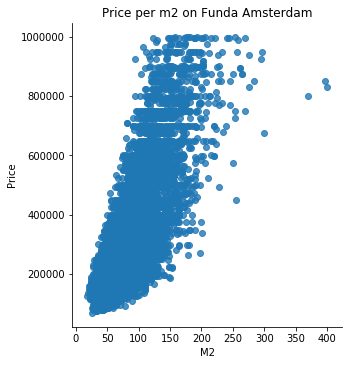

In [4]:
sns.lmplot(x='area', y='price', fit_reg=False, data=df_subset)
plt.xlabel('M2') 
plt.ylabel('Price')
plt.title('Price per m2 on Funda Amsterdam')
plt.show()

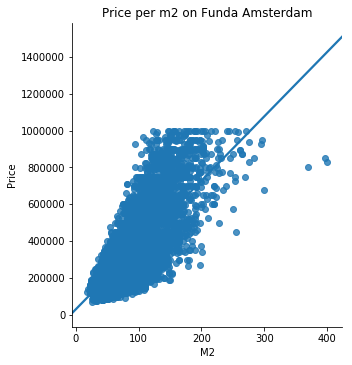

In [5]:
sns.lmplot(x='area', y='price', data=df_subset, ci=False)
plt.xlabel('M2') 
plt.ylabel('Price')
plt.title('Price per m2 on Funda Amsterdam')
plt.show()

In [6]:
x = df_subset[['area']] 
y = df_subset['price']
lm = LinearRegression() 
lm.fit(x, y)

b0 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b1 = lm.intercept_ #gets the intercept

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X")

The regression line is equal to y = 3498.81 + 27983.93X


In [7]:
df = df.drop(columns='Unnamed: 0')  
df['price_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head(10)


,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p
0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,405855.880756
1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,192428.204791
2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003,433846.395637
3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,230915.162752
4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,248409.234552
5,Bertrand Russellstraat 46,125,2,1097 HL,20-5-2016,515000,apartment,3,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1991,465335.724877
6,Admiraal De Ruijterweg 417 I,64,3,1055 ME,14-6-2016,200000,apartment,4,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,251908.048913
7,Deltastraat 10 -boven,155,3,1078 PC,24-5-2016,599000,apartment,5,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,570300.155680
8,Ben van Meerendonkstraat 49,85,2,1087 LB,21-5-2016,249000,apartment,3,10-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2007,325383.150474
9,Jacob van Lennepstraat 263 B,67,2,1053 JE,13-5-2016,300000,apartment,3,27-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1900,262404.491993


In [8]:
x = df[['area']] 
y = df['price'] 
lm = LinearRegression()
lm.fit(x, y) 

df['price_p'] = lm.predict(x)
df['resid'] = df['price'] - df['price_p']

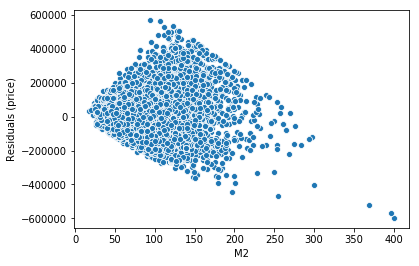

In [10]:
sns.scatterplot(x='area',y='resid',data=df)
plt.xlabel('M2')
plt.ylabel('Residuals (price)')
plt.show()

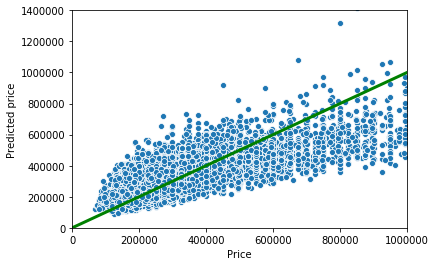

In [22]:
sns.scatterplot(x='price',y='price_p',data=df, )
plt.xlim(0, 1.0e6) 
plt.ylim(0, 1.4e6) 
plt.plot([0, 1.5e6], [0, 1.5e6], color='green', lw=3)
plt.xlabel('Price')
plt.ylabel('Predicted price')
plt.show()

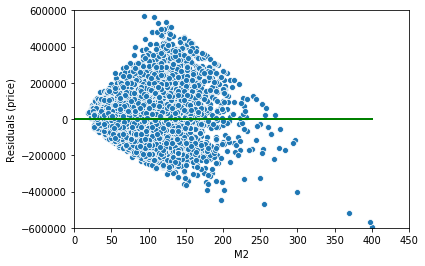

In [30]:
sns.scatterplot(x='area',y='resid',data=df, )
plt.xlabel('M2')
plt.ylabel('Residuals (price)')
plt.xlim(0, 450) 
plt.ylim(-6e5, 6e5) 
plt.plot([0, 400], [0, 0], color='green', lw=2)
plt.show()


In [33]:
r2_score(df['price'], df['price_p'])
#The R^2 is 0.53, which means 53% of the variation in area is explained by the model. That's pretty good!

0.5257421182315432

In [34]:
math.sqrt(mean_squared_error(df['price'], df['price_p']))

118016.87861535022

In [35]:
#The RMSE is 118 thousand. Which means that we are typically about 118 thousand off in our predicted views.